In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
import pickle


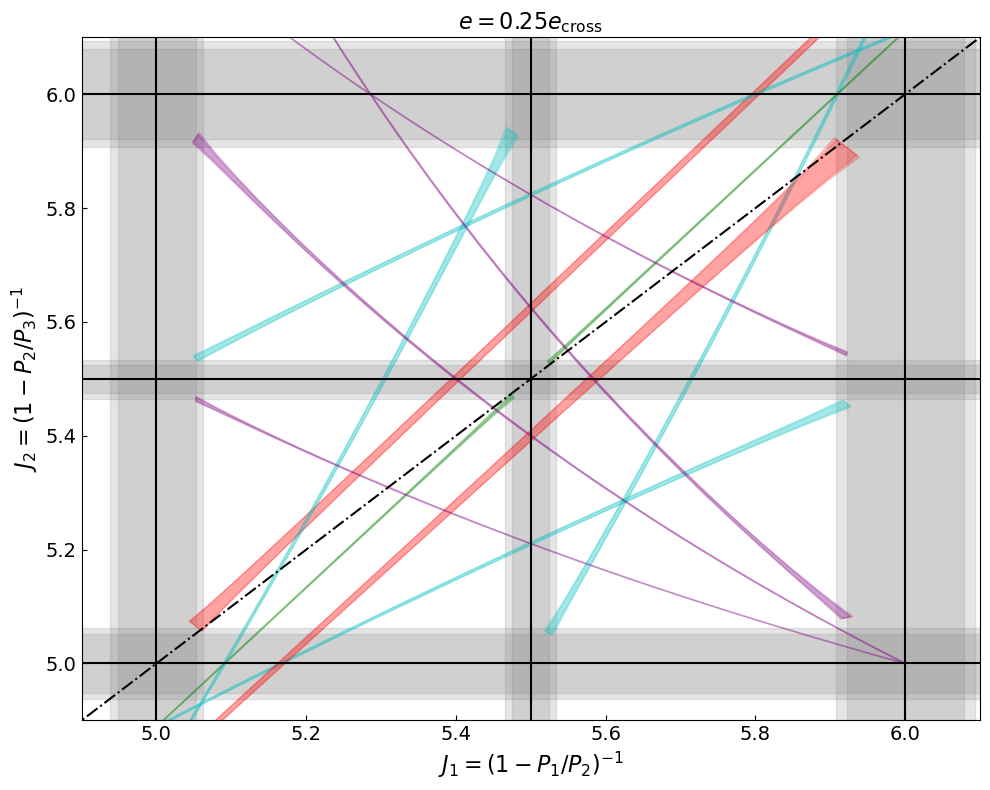

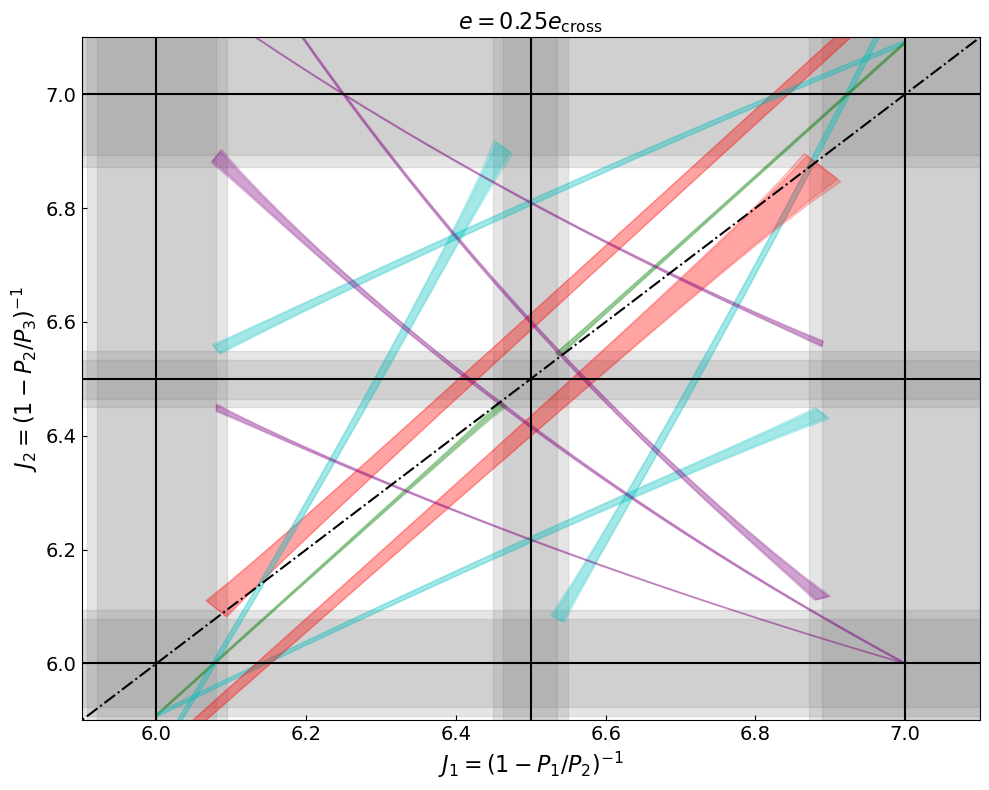

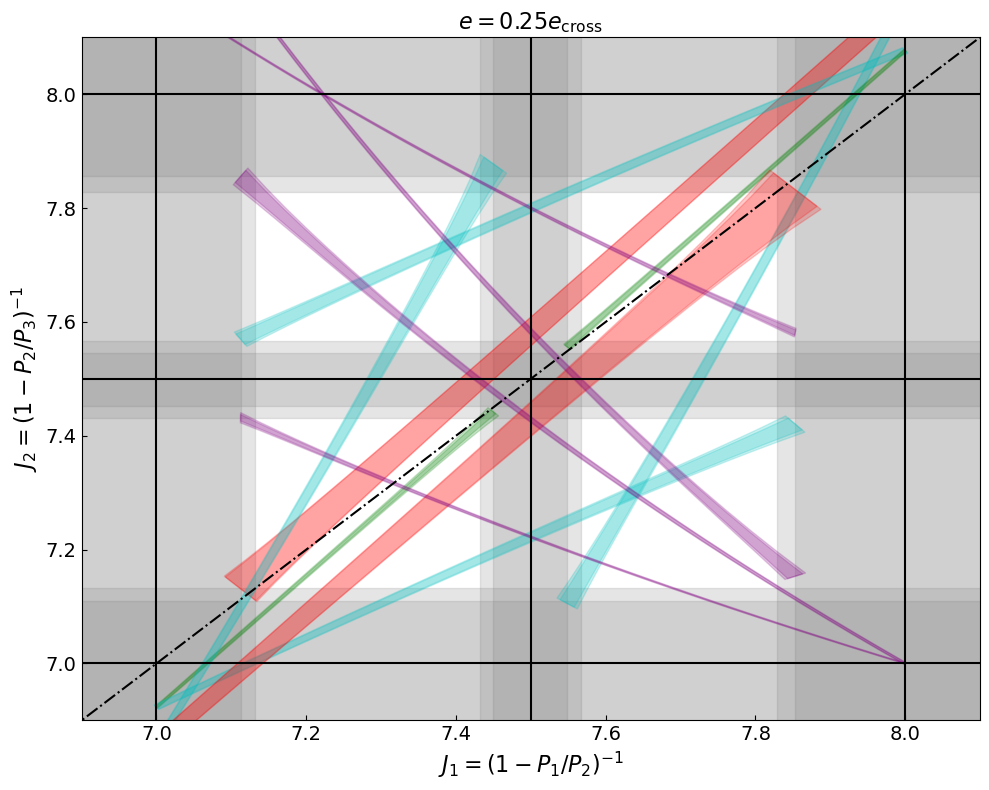

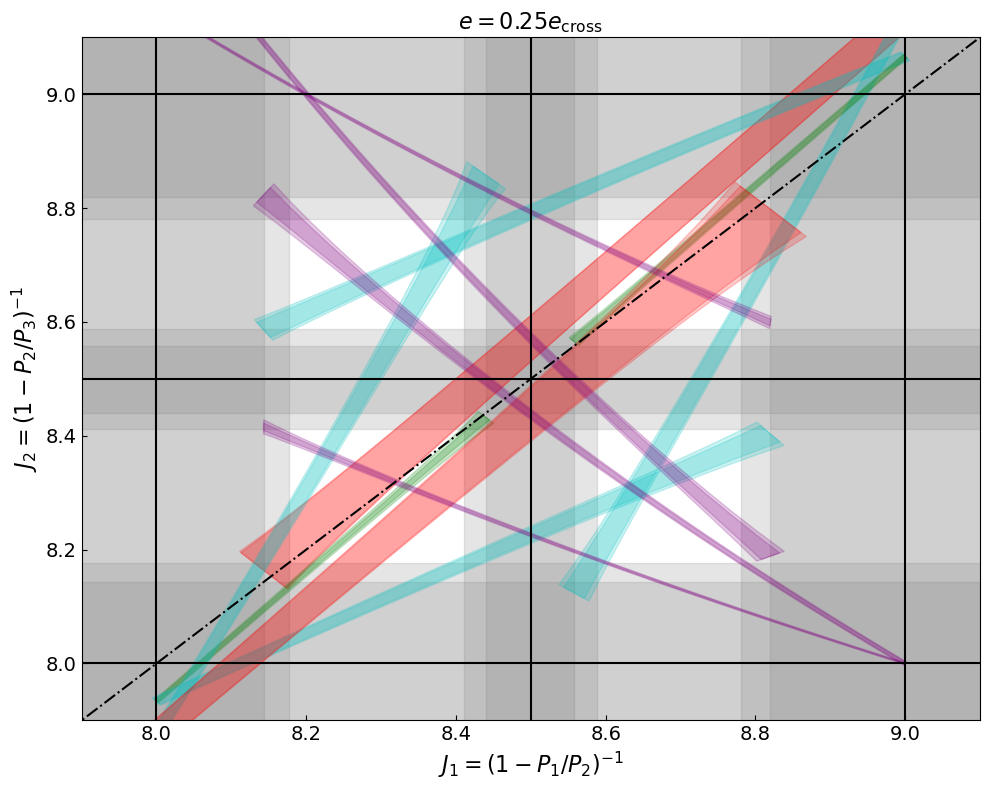

In [2]:
for J in [5,6,7,8]:
    with open("../code/resonance_web_data_J{}.pkl".format(J),"rb") as fi:
        rw_data = pickle.load(fi)
    n_ext = rw_data['n_ext']
    n_ext2 = rw_data['n_ext2']
    inner_sx_m = rw_data['inner_sx_m']
    inner_sx_p = rw_data['inner_sx_p']
    outer_sx_m = rw_data['outer_sx_m']
    outer_sx_p = rw_data['outer_sx_p']
    MMRs = [(J,1),(2*J+1,2),(J+1,1)]

    fig = plt.figure(figsize=(10,8))
    J_in_min,J_in_max,J_out_min,J_out_max = [{} for _ in range(4)]
    for j,k in MMRs:
        plt.axvline(j/k,color='k')
        plt.axhline(j/k,color='k')
        # inner MMRs
        for i in range(2):
            n_median = inner_sx_m[(j,k)][i]
            J_in_max[(j,k)] = 1 + 1/(n_median[0]/n_median[1]-1)
            n_median = inner_sx_p[(j,k)][i]
            J_in_min[(j,k)] = 1 + 1/(n_median[0]/n_median[1]-1)
            plt.fill_betweenx(np.linspace(J-0.2,J+1.2),J_in_min[(j,k)],J_in_max[(j,k)],alpha=0.2,color='gray')

        # outer MMRs
        for i in range(2):
            n_median = outer_sx_m[(j,k)][i]
            J_out_max[(j,k)] = 1 + 1/(n_median[1]/n_median[2]-1)
            n_median = outer_sx_p[(j,k)][i]
            J_out_min[(j,k)] = 1 + 1/(n_median[1]/n_median[2]-1)
            plt.fill_between(np.linspace(J-0.2,J+1.2),J_out_min[(j,k)],J_out_max[(j,k)],alpha=0.2,color='gray')

    plt.ylim(J-0.1,J+1.1)
    plt.xlim(J-0.1,J+1.1)


    #J_x_plot = np.linspace()
    for j1,k1 in MMRs:
        Jin_min = J_in_min[(j1,k1)]
        Jin_max = J_in_max[(j1,k1)]

        for j2,k2 in MMRs:
            if k1+k2 > 4:
                continue
            col = 'rcgb'[k1+k2-2]
            Jout_min = J_out_min[(j2,k2)]
            Jout_max = J_out_max[(j2,k2)]

            if (j1,k1,j2,k2) in n_ext.keys():
                n_ext_p_50,n_ext_m_50,n_ext_p_max,n_ext_m_max= n_ext[(j1,k1,j2,k2)]
                for n_p,n_m in ((n_ext_p_50,n_ext_m_50),(n_ext_p_max,n_ext_m_max)):
                    xp = 1+1/(n_p.T[0]/n_p.T[1]-1)
                    yp = 1+1/(n_p.T[1]/n_p.T[2]-1)
                    xm = 1+1/(n_m.T[0]/n_m.T[1]-1)
                    ym = 1+1/(n_m.T[1]/n_m.T[2]-1)
                    plt.fill(np.append(xp,xm[::-1]),np.append(yp,ym[::-1]),color=col,alpha=0.2)

            if (j1,k1,j2,k2) in n_ext2.keys():
                n_ext_p_50,n_ext_m_50,n_ext_p_max,n_ext_m_max= n_ext2[(j1,k1,j2,k2)]
                for n_p,n_m in ((n_ext_p_50,n_ext_m_50),(n_ext_p_max,n_ext_m_max)):
                    xp = 1+1/(n_p.T[0]/n_p.T[1]-1)
                    yp = 1+1/(n_p.T[1]/n_p.T[2]-1)
                    xm = 1+1/(n_m.T[0]/n_m.T[1]-1)
                    ym = 1+1/(n_m.T[1]/n_m.T[2]-1)
                    plt.fill(np.append(xp,xm[::-1]),np.append(yp,ym[::-1]),color=col,alpha=0.2)

    plt.plot(np.linspace(J-1,J+2),np.linspace(J-1,J+2),'k-.')

    for key,val in rw_data['n_ext_plus'].items():
        j1,k1,j2,k2 = key
        n_ext_p_50,n_ext_m_50,n_ext_p_max,n_ext_m_max = val
        for n_p,n_m in ((n_ext_p_50,n_ext_m_50),(n_ext_p_max,n_ext_m_max)):
            xp = 1+1/(n_p.T[0]/n_p.T[1]-1)
            yp = 1+1/(n_p.T[1]/n_p.T[2]-1)
            xm = 1+1/(n_m.T[0]/n_m.T[1]-1)
            ym = 1+1/(n_m.T[1]/n_m.T[2]-1)

            plt.fill(np.append(xp,xm[::-1]),np.append(yp,ym[::-1]),color='purple',alpha=0.2)
    plt.xlabel("$J_1=(1-P_1/P_2)^{-1}$",fontsize=16)        
    plt.ylabel("$J_2=(1-P_2/P_3)^{-1}$",fontsize=16)
    plt.title("$e = 0.25e_\mathrm{cross}$",fontsize=16)
    plt.tick_params(direction='in',labelsize=14)
    plt.tight_layout()
    #plt.savefig("../figures/web_0_25ex_J{}.png".format(J))

In [4]:
J=7
with open("../code/resonance_web_data_J{}.pkl".format(J),"rb") as fi:
    rw_data = pickle.load(fi)
n_ext = rw_data['n_ext']
n_ext2 = rw_data['n_ext2']
inner_sx_m = rw_data['inner_sx_m']
inner_sx_p = rw_data['inner_sx_p']
outer_sx_m = rw_data['outer_sx_m']
outer_sx_p = rw_data['outer_sx_p']
MMRs = [(J,1),(2*J+1,2),(J+1,1)]

In [8]:
from glob import glob
import re
files = glob("/fs/lustre/cita/hadden/04_instability/code/*.npz")

(6.9, 8.1)

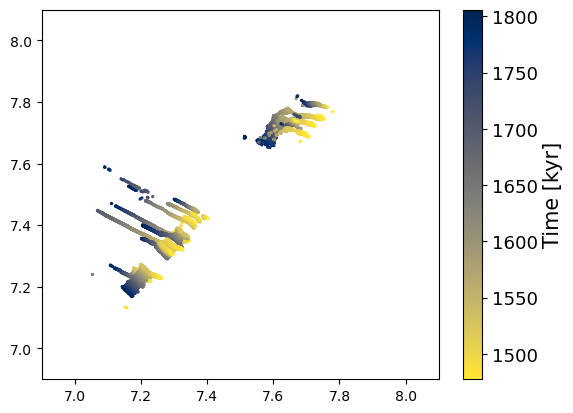

In [10]:
import sys
sys.path.append("../code/")

from three_body_mmr import in_mmrs_Q
P_to_J = lambda P: 1 + 1/(P-1)
J_to_P = lambda J: J/(J-1)

for file in files:
    in_res_file = re.sub(r"chaotic_traj_J0_7.(\d+).npz","in_res_J0_7.\g<1>.pkl",file)
    data = np.load(file)
    P_mean = data['P_mean']
    times = data['times']
    values = data['values']
    ms = 3e-6 * np.ones(3)
    in_res_Q_inner,in_res_Q_outer = in_mmrs_Q(ms,rw_data['inner_Pjk'],rw_data['outer_Pjk'],data['values'])
    with open(in_res_file,"wb") as fi:
        pickle.dump((in_res_Q_inner,in_res_Q_outer),fi)
    in_a_res = np.zeros(len(times),dtype=bool)
    for inres in in_res_Q_inner.values():
        in_a_res = np.logical_or(in_a_res,inres)
    for inres in in_res_Q_outer.values():
        in_a_res = np.logical_or(in_a_res,inres)
    msk = np.logical_not(in_a_res)
    x=P_to_J(P_mean[1]/P_mean[0])[msk]
    y=P_to_J(P_mean[2]/P_mean[1])[msk]
    plt.scatter(x[::-1],y[::-1],c=times[msk][::-1]/1e3,s=2,cmap='cividis_r')
cb = plt.colorbar()
cb.set_label(label='Time [kyr]',size= 15)
cb.ax.tick_params(labelsize=13)
plt.ylim(J-0.1,J+1.1)
plt.xlim(J-0.1,J+1.1)


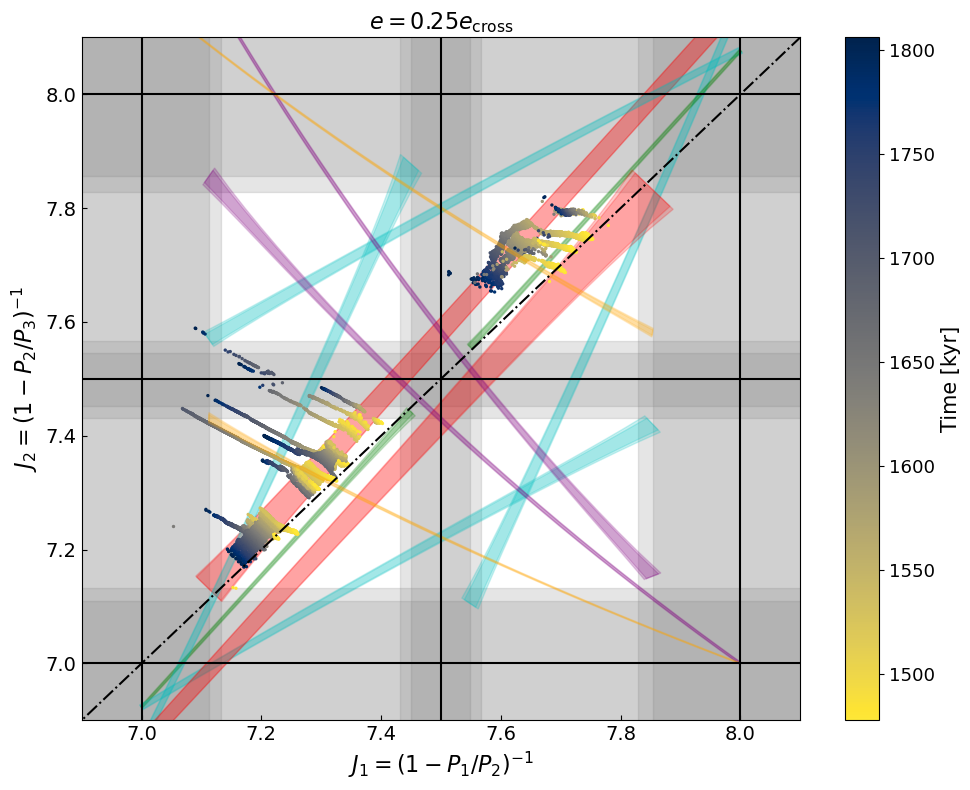

In [11]:
J=7
with open("../code/resonance_web_data_J{}.pkl".format(J),"rb") as fi:
    rw_data = pickle.load(fi)
n_ext = rw_data['n_ext']
n_ext2 = rw_data['n_ext2']
inner_sx_m = rw_data['inner_sx_m']
inner_sx_p = rw_data['inner_sx_p']
outer_sx_m = rw_data['outer_sx_m']
outer_sx_p = rw_data['outer_sx_p']
MMRs = [(J,1),(2*J+1,2),(J+1,1)]

fig = plt.figure(figsize=(10,8))
J_in_min,J_in_max,J_out_min,J_out_max = [{} for _ in range(4)]
for j,k in MMRs:
    plt.axvline(j/k,color='k')
    plt.axhline(j/k,color='k')
    # inner MMRs
    for i in range(2):
        n_median = inner_sx_m[(j,k)][i]
        J_in_max[(j,k)] = 1 + 1/(n_median[0]/n_median[1]-1)
        n_median = inner_sx_p[(j,k)][i]
        J_in_min[(j,k)] = 1 + 1/(n_median[0]/n_median[1]-1)
        plt.fill_betweenx(np.linspace(J-0.2,J+1.2),J_in_min[(j,k)],J_in_max[(j,k)],alpha=0.2,color='gray')

    # outer MMRs
    for i in range(2):
        n_median = outer_sx_m[(j,k)][i]
        J_out_max[(j,k)] = 1 + 1/(n_median[1]/n_median[2]-1)
        n_median = outer_sx_p[(j,k)][i]
        J_out_min[(j,k)] = 1 + 1/(n_median[1]/n_median[2]-1)
        plt.fill_between(np.linspace(J-0.2,J+1.2),J_out_min[(j,k)],J_out_max[(j,k)],alpha=0.2,color='gray')

plt.ylim(J-0.1,J+1.1)
plt.xlim(J-0.1,J+1.1)


#J_x_plot = np.linspace()
for j1,k1 in MMRs:
    Jin_min = J_in_min[(j1,k1)]
    Jin_max = J_in_max[(j1,k1)]

    for j2,k2 in MMRs:
        if k1+k2 > 4:
            continue
        col = 'rcgb'[k1+k2-2]
        Jout_min = J_out_min[(j2,k2)]
        Jout_max = J_out_max[(j2,k2)]

        if (j1,k1,j2,k2) in n_ext.keys():
            n_ext_p_50,n_ext_m_50,n_ext_p_max,n_ext_m_max= n_ext[(j1,k1,j2,k2)]
            for n_p,n_m in ((n_ext_p_50,n_ext_m_50),(n_ext_p_max,n_ext_m_max)):
                xp = 1+1/(n_p.T[0]/n_p.T[1]-1)
                yp = 1+1/(n_p.T[1]/n_p.T[2]-1)
                xm = 1+1/(n_m.T[0]/n_m.T[1]-1)
                ym = 1+1/(n_m.T[1]/n_m.T[2]-1)
                plt.fill(np.append(xp,xm[::-1]),np.append(yp,ym[::-1]),color=col,alpha=0.2)

        if (j1,k1,j2,k2) in n_ext2.keys():
            n_ext_p_50,n_ext_m_50,n_ext_p_max,n_ext_m_max= n_ext2[(j1,k1,j2,k2)]
            for n_p,n_m in ((n_ext_p_50,n_ext_m_50),(n_ext_p_max,n_ext_m_max)):
                xp = 1+1/(n_p.T[0]/n_p.T[1]-1)
                yp = 1+1/(n_p.T[1]/n_p.T[2]-1)
                xm = 1+1/(n_m.T[0]/n_m.T[1]-1)
                ym = 1+1/(n_m.T[1]/n_m.T[2]-1)
                plt.fill(np.append(xp,xm[::-1]),np.append(yp,ym[::-1]),color=col,alpha=0.2)

plt.plot(np.linspace(J-1,J+2),np.linspace(J-1,J+2),'k-.')


for file in files:
    data = np.load(file)
    P_mean = data['P_mean']
    P = data['P']
    times = data['times']
    in_res_file = re.sub(r"chaotic_traj_J0_7.(\d+).npz","in_res_J0_7.\g<1>.pkl",file)
    with open(in_res_file,'rb') as fi:
        in_res_Q_inner,in_res_Q_outer = pickle.load(fi)
    in_a_res = np.zeros(len(times),dtype=bool)
    for inres in in_res_Q_inner.values():
        in_a_res = np.logical_or(in_a_res,inres)
    for inres in in_res_Q_outer.values():
        in_a_res = np.logical_or(in_a_res,inres)
        
    msk = np.logical_not(in_a_res)
    x=P_to_J(P_mean[1]/P_mean[0])[msk]
    y=P_to_J(P_mean[2]/P_mean[1])[msk]
    plt.scatter(x[::-1],y[::-1],c=times[msk][::-1]/1e3,s=2,cmap='cividis_r')
    
#     x=P_to_J(P[1]/P[0])[in_a_res]
#     y=P_to_J(P[2]/P[1])[in_a_res]
#     plt.scatter(x[::-1],y[::-1], s=2, c=times[in_a_res][::-1]/1e3, cmap='cividis_r', alpha = 0.2)


cb = plt.colorbar()
cb.set_label(label='Time [kyr]',size= 15)
cb.ax.tick_params(labelsize=13)

for key,val in rw_data['n_ext_plus'].items():
    j1,k1,j2,k2 = key
    n_ext_p_50,n_ext_m_50,n_ext_p_max,n_ext_m_max = val
    if k1+k2==2:
        col='purple'
    else:
        col='orange'
    for n_p,n_m in ((n_ext_p_50,n_ext_m_50),(n_ext_p_max,n_ext_m_max)):
        xp = 1+1/(n_p.T[0]/n_p.T[1]-1)
        yp = 1+1/(n_p.T[1]/n_p.T[2]-1)
        xm = 1+1/(n_m.T[0]/n_m.T[1]-1)
        ym = 1+1/(n_m.T[1]/n_m.T[2]-1)
    
        plt.fill(np.append(xp,xm[::-1]),np.append(yp,ym[::-1]),color=col,alpha=0.2)
plt.xlabel("$J_1=(1-P_1/P_2)^{-1}$",fontsize=16)        
plt.ylabel("$J_2=(1-P_2/P_3)^{-1}$",fontsize=16)
plt.title("$e = 0.25e_\mathrm{cross}$",fontsize=16)
plt.tick_params(direction='in',labelsize=14)
plt.tight_layout()
#plt.savefig("../figures/web_with_points.png")
# n_in_ratio = J_to_P(np.linspace(7,7.5))
# n2 = 1/n_in_ratio
# for k in (1,2,3/2):
#     n3 =  ((7*k + 6)*n2 - 6*k)/7 
#     plt.plot(np.linspace(7,7.5),P_to_J(n2/n3))
# n3 = ((13-7)*n2+6)/15
# plt.plot(np.linspace(7,7.5),P_to_J(n2/n3))

# does in a resQ work?

In [14]:
files.sort()

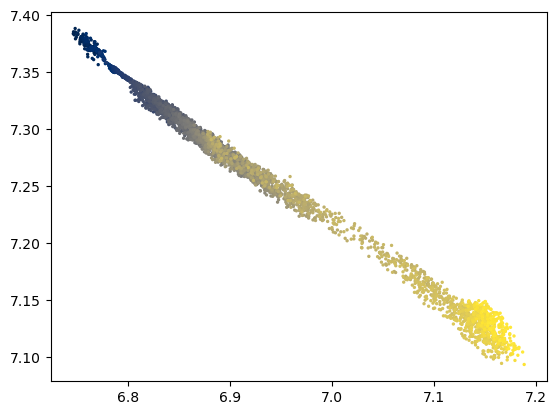

In [19]:
file = files[1]
data = np.load(file)
P_mean = data['P_mean']
P = data['P']
times = data['times']
in_res_file = re.sub(r"chaotic_traj_J0_7.(\d+).npz","in_res_J0_7.\g<1>.pkl",file)
with open(in_res_file,'rb') as fi:
    in_res_Q_inner,in_res_Q_outer = pickle.load(fi)
in_a_res = np.zeros(len(times),dtype=bool)
for inres in in_res_Q_inner.values():
    in_a_res = np.logical_or(in_a_res,inres)
for inres in in_res_Q_outer.values():
    in_a_res = np.logical_or(in_a_res,inres)

msk = np.logical_not(in_a_res)
x=P_to_J(P_mean[1]/P_mean[0])[msk]
y=P_to_J(P_mean[2]/P_mean[1])[msk]
plt.scatter(x[::-1],y[::-1],c=times[msk][::-1]/1e3,s=2,cmap='cividis_r')

msk = (in_a_res)
x=P_to_J(P[1]/P[0])[msk]
y=P_to_J(P[2]/P[1])[msk]
plt.scatter(x[::-1],y[::-1],c=times[msk][::-1]/1e3,s=2,cmap='cividis_r')


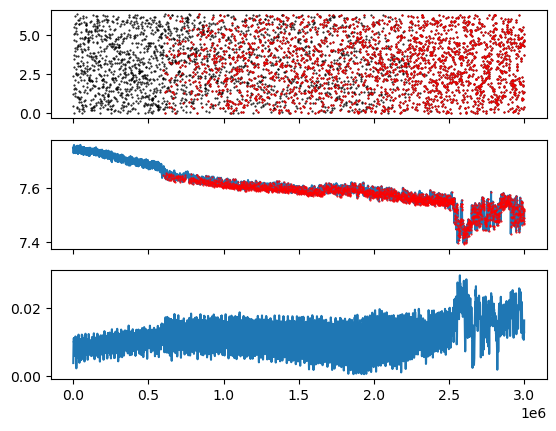

In [27]:
file = files[-4]
data = np.load(file)
in_res_file = re.sub(r"chaotic_traj_J0_7.(\d+).npz","in_res_J0_7.\g<1>.pkl",file)
with open(in_res_file,'rb') as fi:
    in_res_Q_inner,in_res_Q_outer = pickle.load(fi)

j,k = 15,2
state_values = data['values']
P = data['P']
Lambdas = state_values.T[3*3 + np.array((0,3,6))]
lambdas = state_values.T[0 + np.array((0,3,6))]
etas = state_values.T[1 + np.array((0,3,6))]
kappas = state_values.T[1 + 3*3 + np.array((0,3,6))]
xs = np.transpose((kappas-1j*etas)/np.sqrt(2))
Xs = xs.T/np.sqrt(0.5*Lambdas)
Pjk_vals = ([rw_data['inner_Pjk'][(j,k)](x,[],[]) for x in xs])
phi_res = np.array([k-j,j,0]) @ lambdas + np.angle(Pjk_vals)
phi_res = np.mod(phi_res,2 * np.pi)
fig,ax = plt.subplots(3,1,sharex=True)
ax[0].plot(data['times'],phi_res,'k.',ms=1)
ax[0].plot(data['times'][in_res_Q_inner[(j,k)]],phi_res[in_res_Q_inner[(j,k)]],'r.',ms=1)
ax[1].plot(data['times'],P_to_J(P[1]/P[0]),ms=1)
ax[1].plot(
    data['times'][in_res_Q_inner[(j,k)]],
    P_to_J(P[1]/P[0])[in_res_Q_inner[(j,k)]],
    'r.',
    ms=1
)
plt.plot(data['times'],np.abs(Xs[1] - Xs[0]))

In [ ]:
for file in files:
    data = np.load(file)
    P_mean = data['P_mean']
    P = data['P']
    times = data['times']
    in_res_file = re.sub(r"chaotic_traj_J0_7.(\d+).npz","in_res_J0_7.\g<1>.pkl",file)
    with open(in_res_file,'rb') as fi:
        in_res_Q_inner,in_res_Q_outer = pickle.load(fi)
    in_a_res = np.zeros(len(times),dtype=bool)
    for inres in in_res_Q_inner.values():
        in_a_res = np.logical_or(in_a_res,inres)
    for inres in in_res_Q_outer.values():
        in_a_res = np.logical_or(in_a_res,inres)
        
    msk = np.logical_not(in_a_res)
    x=P_to_J(P_mean[1]/P_mean[0])[msk]
    y=P_to_J(P_mean[2]/P_mean[1])[msk]
    plt.scatter(x[::-1],y[::-1],c=times[msk][::-1]/1e3,s=2,cmap='cividis_r')


In [272]:
import sys
sys.path.append("../code/")

from three_body_mmr import in_mmrs_Q

for file in files:
    in_res_file = re.sub(r"chaotic_traj_J0_7.(\d+).npz","in_res_J0_7.\g<1>.pkl",file)
    data = np.load(file)
    P_mean = data['P_mean']
    times = data['times']
    values = data['values']
    ms = 3e-6 * np.ones(3)
    in_res_Q_inner,in_res_Q_outer = in_mmrs_Q(ms,rw_data['inner_Pjk'],rw_data['outer_Pjk'],data['values'])
    with open(in_res_file,"wb") as fi:
        pickle.dump((in_res_Q_inner,in_res_Q_outer),fi)
    in_a_res = np.zeros(len(times),dtype=bool)
    for inres in in_res_Q_inner.values():
        in_a_res = np.logical_or(in_a_res,inres)
    for inres in in_res_Q_outer.values():
        in_a_res = np.logical_or(in_a_res,inres)
    msk = np.logical_not(in_a_res)
    x=P_to_J(P_mean[1]/P_mean[0])[msk]
    y=P_to_J(P_mean[2]/P_mean[1])[msk]
    plt.scatter(x[::-1],y[::-1],c=times[msk][::-1]/1e3,s=2,cmap='cividis_r')
cb = plt.colorbar()
cb.set_label(label='Time [kyr]',size= 15)
cb.ax.tick_params(labelsize=13)
plt.ylim(J-0.1,J+1.1)
plt.xlim(J-0.1,J+1.1)


In [ ]:
tx = []
for file in files:
    data = np.load(file)
    P_mean = data['P_mean']
    times = data['times']
    tx.append(times[-1])
    msk = times<3.e6
    x=P_to_J(P_mean[1]/P_mean[0])[msk]
    y=P_to_J(P_mean[2]/P_mean[1])[msk]
    plt.scatter(x[::-1],y[::-1],c=times[msk][::-1],s=1,cmap='cividis_r')
cb = plt.colorbar()
cb.set_label(label='Time [kyr]',size= 15)

plt.tight_layout()
plt.xlim(7,8)
plt.ylim(7,8)

In [ ]:
import sys
sys.path.append("../code/")
from three_body_mmr import three_body_mmr_n_and_dn

In [ ]:
three_body_mmr_n_and_dn(j1,k1,j1,k1,0.01,3e-6 * np.ones(3),np.zeros(3))

In [ ]:
j1,k1 = 7,1
n,dn,Lambda = three_body_mmr_n_and_dn(j1,k1,j1,k1,-1,3e-6 * np.ones(3),0.0,n1=2*np.pi,GM=1)
Pjk_in = rw_data['inner_Pjk'][(j1,k1)]
jvec1 = np.array((k1-j1,j1,0))
Minv = jvec1**2 @ dn
Lambdas = data['values'].T[3*3 + np.array((0,3,6))]
etas = data['values'].T[1 + np.array((0,3,6))]
kappas = data['values'].T[1 + 3*3 + np.array((0,3,6))]

In [ ]:
Mstar = 1
ms = 3e-6 * np.ones(3)
mus = ms*Mstar/(Mstar+ms)
Mi = ms + Mstar
Mi * (Lambdas.T / mus)**(-3)

In [111]:
import sys
sys.path.append("../code/")

In [242]:
import rebound as rb

In [257]:
sim = rb.Simulation()
sim.add(m=1)
ep = ((7/6)**(2/3) -1)/((7/6)**(2/3) + 1)
phi0=np.pi-0.1
sim.add(m=3e-6,P=1,l=0,e=ep,pomega=0)
sim.add(m=3e-6,P=7/6,l=phi0/7,pomega=np.pi)
pvars = cm.Poincare.from_Simulation(sim)
pham = cm.PoincareHamiltonian(pvars)
pham.add_MMR_terms(7,1)
n = pham.calculate_flow()[np.array((0,3))]
jac = pham.calculate_jacobian()
dn = np.array((jac[0,pham.N_dof],jac[3,pham.N_dof+3]))
N = 256
times = np.linspace(0,1e3,N)
phi = np.zeros(N)
Pratio = np.zeros(N)
Pjk = np.zeros(N,dtype=np.complex128)
jvec = np.array((-6,7))
Minv = jvec**2 @ dn

for i,t in enumerate(times):
    pham.integrate(t)
    p1,p2 = pham.particles[1],pham.particles[2]
    Pjk[i] = Pjk_in([p1.x,p2.x,0],[],[])
    phi[i] = 7 * p2.l - 6 * p1.l + np.angle(Pjk[i])

    phi = np.mod(phi,2*np.pi)
    Pratio[i] = p2.P/p1.P

In [ ]:
np.mean()

In [268]:
nplus  = n + 2 * np.sqrt(np.abs(2 * Pjk[0]/Minv)) * jvec * dn
nminus = n - 2 * np.sqrt(np.abs(2 * Pjk[0]/Minv)) * jvec * dn

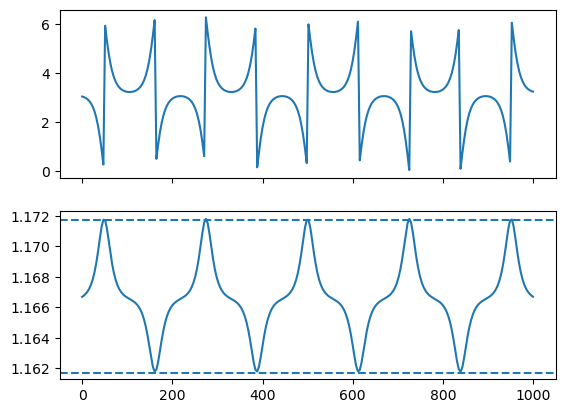

In [270]:
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(times,phi)
ax[1].plot(times,Pratio)
ax[1].axhline(nplus[0]/nplus[1],ls='--')
ax[1].axhline(nminus[0]/nminus[1],ls='--')
#plt.ylim(nplus[0]/nplus[1]  , nminus[0]/nminus[1])